In [1]:
import detprocess as dp
import numpy as np
import pandas as pd
from pprint import pprint
import astropy
import vaex as vx
from matplotlib import pyplot as plt
from detanalysis import Analyzer, Semiautocut, ScatterPlotter 
import matplotlib as mpl
import qetpy
import scipy
from scipy.optimize import curve_fit
from scipy.stats import skewnorm
from scipy import stats, optimize, interpolate
import scipy.optimize as opt
from scipy.special import erf
import math
from astropy import units as U
import qetpy as qp
from detprocess.core import Template

mpl.rcParams['figure.figsize'] = [10, 6.5]
from pytesdaq.io.hdf5 import H5Reader,H5Writer

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


In [2]:
#lets get the energy norms
template = Template()
filter_file = '/data/lbl/mw_salt/run46_filter.hdf5'
template.load_hdf5(filter_file, overwrite=False)
regtemp,time = template.get_template('Mv3025pcRegular', tag='default')
bigtemp,time2 = template.get_template('Mv3025pcBigFins', tag='default')
regdpdi = template.get_dpdi('Mv3025pcRegular', poles = 3, tag='default')
bigdpdi = template.get_dpdi('Mv3025pcBigFins', poles = 3, tag='default')
regnorm = qp.get_energy_normalization(time, regtemp, dpdi=regdpdi[0], lgc_ev=True)
bignorm = qp.get_energy_normalization(time2, bigtemp, dpdi=bigdpdi[0], lgc_ev=True)

INFO: Loading filter data from file /data/lbl/mw_salt/run46_filter.hdf5


In [3]:
reddidp0 = 4.024891360047181e-07*((0.002620722961208931+0.004999999888241291)-0.09201159604909384)
bigdidp0 = 3.986692004980754e-07*((0.007986914299916825+0.004999999888241291)-0.09974712073564067)

In [4]:
print(regnorm)
print(bignorm)

29624741.00241557
21434523.83916706


In [5]:
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241112_T152627',series=None)#5ev
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T152812',series=None)#5ev v2
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241112_T154349',series=None)#10eV
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241112_T173819',series=None)#10eV v2
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T153104',series=None)#10eV v3
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241112_T154601',series=None)#15eV
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241112_T174135',series=None)#15eV v2
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241112_T224405',series=None)#15eV v3
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T160513',series=None)#15eV v4
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T095305',series=None)#15eV v4
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T161834',series=None)#15eV v4
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T163438',series=None)#15eV v4
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T154203',series=None)#30eV recent update
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T164914',series=None)#30eV original version
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T173420',series=None)#30eV recent version 5sig
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T174430',series=None)#30eV recent version 5sig
salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T175330',series=None)
salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T180823',series=None)
salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T190307',series=None)
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T170320',series=None)#30eV original first part, recent 2nd part
#salt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T171047',series=None)#30eV original 2nd part, recent 1st part
#SPICE1pc_Ar = Analyzer('/sdata2/lbl/run7/processed/continuous_I4_D20231123_T095519/SPICE1pc_Ar_2krandoms_trig_6sig_feat_v2_feature_I4_D20231215_T152103/',series=None)
#Analyzer('/sdata2/lbl/run7/processed/continuous_I4_D20231123_T095519/SPICE1pc_Ar_2krandoms_trig_6sig_feat_v1_feature_I4_D20231212_T212710/',series=None)

In [6]:
salt.df 

#,processing_id,trigger_amplitude,trigger_time,trigger_index,trigger_pileup_window,trigger_threshold_sigma,trigger_type,trigger_amplitude_Mv3025pc,trigger_time_Mv3025pc,trigger_index_Mv3025pc,trigger_pileup_window_Mv3025pc,trigger_threshold_sigma_Mv3025pc,trigger_type_Mv3025pc,trigger_channel,series_number,event_number,dump_number,series_start_time,group_start_time,fridge_run_start_time,fridge_run_number,data_type,group_name,event_time,trigger_prod_id,tes_bias_Mv3025pcRegular,output_gain_Mv3025pcRegular,amp_of1x1_nodelay_Mv3025pcRegular,chi2_of1x1_nodelay_Mv3025pcRegular,lowchi2_of1x1_nodelay_Mv3025pcRegular,amp_of1x1_unconstrained_Mv3025pcRegular,t0_of1x1_unconstrained_Mv3025pcRegular,chi2_of1x1_unconstrained_Mv3025pcRegular,lowchi2_of1x1_unconstrained_Mv3025pcRegular,amp_of1x1_constrained_Mv3025pcRegular,t0_of1x1_constrained_Mv3025pcRegular,chi2_of1x1_constrained_Mv3025pcRegular,lowchi2_of1x1_constrained_Mv3025pcRegular,chi2nopulse_of1x1_constrained_Mv3025pcRegular,ampres_of1x1_constrained_Mv3025pcRegular,timeres_of1x1_constrained_Mv3025pcRegular,baseline_Mv3025pcRegular,baseline_end_Mv3025pcRegular,maximum_Mv3025pcRegular,minimum_Mv3025pcRegular,integral_Mv3025pcRegular,energyabsorbed_Mv3025pcRegular,psd_amp_45_75_Mv3025pcRegular,psd_amp_300_500_Mv3025pcRegular,psd_amp_350_450_Mv3025pcRegular,psd_amp_150_250_Mv3025pcRegular,psd_amp_250_350_Mv3025pcRegular,index
0,nan,-51.2122339774686,0.2601832,325229,12500,5,4,-51.2122339774686,0.2601832,325229,12500,5,4,Mv3025pc,220240620165258,100001,1,12,94,291190,46,Test,continuous_I2_D20240620_T165135,1718927590,1,6.873238095238094e-06,50.0,1.770628548585784e-08,25126.27384810463,2038.6664755474535,2.0582178745770187e-08,5.6e-06,25116.513116830236,2027.5090727472138,2.0582178745770187e-08,5.6e-06,25116.513116830236,2027.5090727472138,25154.06436155964,3.358761580563028e-09,9.393048458095832e-07,-2.703174441552162e-07,-2.6841024507438076e-07,-2.4767744541168215e-07,-3.3393409252166747e-07,-1.4582631390571594e-10,-1.5915059202226793e-16,4.824586536061757e-08,3.220123187579437e-08,4.0027926137536124e-08,3.1065744224663317e-07,7.972256499256804e-08,0
1,nan,-51.552436013650556,0.864796,1080995,12500,5,4,-51.552436013650556,0.864796,1080995,12500,5,4,Mv3025pc,220240620165258,100001,1,13,95,291191,46,Test,continuous_I2_D20240620_T165135,1718927591,2,6.873238095238094e-06,50.0,1.6727297019836837e-08,25216.901020243527,2062.4667942859414,3.836817807618196e-08,0.009996,25111.211356352673,1970.0303422663856,1.7298917640248083e-08,-4e-06,25215.176917389403,2062.4496974095337,25241.703390327926,3.358761580563028e-09,1.1175809166372618e-06,-2.853381033968926e-07,-2.913638617589672e-07,-2.2467567920684814e-07,-3.059319496154785e-07,-1.2949295318603514e-10,1.7662428720171635e-16,7.943831221664586e-08,3.5716858067271525e-08,3.5883503348803234e-08,2.505142954402946e-07,6.417854589591826e-08,1
2,nan,-50.04042390009701,1.7406792,2175849,12500,5,4,-50.04042390009701,1.7406792,2175849,12500,5,4,Mv3025pc,220240620165258,100001,1,14,96,291192,46,Test,continuous_I2_D20240620_T165135,1718927592,3,6.873238095238094e-06,50.0,1.62355978434759e-08,26279.21501257108,2222.4138015663657,-3.3438178638838544e-08,0.0099968,26203.468536798893,2160.876653213514,1.8411271713982903e-08,-2.56e-05,26272.533120702392,2219.5208639049724,26302.580681396284,3.358761580563028e-09,1.0500600139716618e-06,-2.8721674841165543e-07,-2.834527851355196e-07,-2.496776103973389e-07,-3.1943297386169433e-07,-1.4605993167877198e-10,-2.7537644486546687e-17,1.8956986900502188e-08,3.176490592929993e-08,3.2960186865246305e-08,1.685217094972045e-07,5.728551911798658e-08,2
3,nan,-50.68033524116431,2.0064296,2508037,12500,5,4,-50.68033524116431,2.0064296,2508037,12500,5,4,Mv3025pc,220240620165258,100001,1,14,96,291192,46,Test,continuous_I2_D20240620_T165135,1718927592,4,6.873238095238094e-06,50.0,1.895290728622988e-08,25433.97508434409,2253.3666820017734,3.0498810141296524e-08,8.8e-06,25383.3633844239,2206.983833137432,3.0498810141296524e-08,8.8e-06,2

In [7]:
#nosalt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241112_T151540',series=None)
nosalt = Analyzer('/data/lbl/mw_salt/continuous_I2_D20240620_T165135/feature_I2_D20241113_T180030',series=None)

In [8]:
nosalt.df

#,processing_id,trigger_amplitude,trigger_time,trigger_index,trigger_pileup_window,trigger_threshold_sigma,trigger_type,trigger_amplitude_Mv3025pc,trigger_time_Mv3025pc,trigger_index_Mv3025pc,trigger_pileup_window_Mv3025pc,trigger_threshold_sigma_Mv3025pc,trigger_type_Mv3025pc,trigger_channel,series_number,event_number,dump_number,series_start_time,group_start_time,fridge_run_start_time,fridge_run_number,data_type,group_name,event_time,trigger_prod_id,tes_bias_Mv3025pcRegular,output_gain_Mv3025pcRegular,tes_bias_Mv3025pcBigFins,output_gain_Mv3025pcBigFins,amp_of1x1_nodelay_Mv3025pcRegular,chi2_of1x1_nodelay_Mv3025pcRegular,lowchi2_of1x1_nodelay_Mv3025pcRegular,amp_of1x1_unconstrained_Mv3025pcRegular,t0_of1x1_unconstrained_Mv3025pcRegular,chi2_of1x1_unconstrained_Mv3025pcRegular,lowchi2_of1x1_unconstrained_Mv3025pcRegular,amp_of1x1_constrained_Mv3025pcRegular,t0_of1x1_constrained_Mv3025pcRegular,chi2_of1x1_constrained_Mv3025pcRegular,lowchi2_of1x1_constrained_Mv3025pcRegular,chi2nopulse_of1x1_constrained_Mv3025pcRegular,ampres_of1x1_constrained_Mv3025pcRegular,timeres_of1x1_constrained_Mv3025pcRegular,baseline_Mv3025pcRegular,baseline_end_Mv3025pcRegular,maximum_Mv3025pcRegular,minimum_Mv3025pcRegular,integral_Mv3025pcRegular,energyabsorbed_Mv3025pcRegular,psd_amp_45_75_Mv3025pcRegular,psd_amp_300_500_Mv3025pcRegular,psd_amp_350_450_Mv3025pcRegular,psd_amp_150_250_Mv3025pcRegular,psd_amp_250_350_Mv3025pcRegular,amp_of1x1_nodelay_Mv3025pcBigFins,chi2_of1x1_nodelay_Mv3025pcBigFins,lowchi2_of1x1_nodelay_Mv3025pcBigFins,amp_of1x1_unconstrained_Mv3025pcBigFins,t0_of1x1_unconstrained_Mv3025pcBigFins,chi2_of1x1_unconstrained_Mv3025pcBigFins,lowchi2_of1x1_unconstrained_Mv3025pcBigFins,amp_of1x1_constrained_Mv3025pcBigFins,t0_of1x1_constrained_Mv3025pcBigFins,chi2_of1x1_constrained_Mv3025pcBigFins,lowchi2_of1x1_constrained_Mv3025pcBigFins,chi2nopulse_of1x1_constrained_Mv3025pcBigFins,ampres_of1x1_constrained_Mv3025pcBigFins,timeres_of1x1_constrained_Mv3025pcBigFins,baseline_Mv3025pcBigFins,baseline_end_Mv3025pcBigFins,maximum_Mv3025pcBigFins,minimum_Mv3025pcBigFins,integral_Mv3025pcBigFins,energyabsorbed_Mv3025pcBigFins,psd_amp_45_75_Mv3025pcBigFins,psd_amp_300_500_Mv3025pcBigFins,psd_amp_350_450_Mv3025pcBigFins,psd_amp_150_250_Mv3025pcBigFins,psd_amp_250_350_Mv3025pcBigFins,index
0,nan,-51.2122339774686,0.2601832,325229,12500,5,4,-51.2122339774686,0.2601832,325229,12500,5,4,Mv3025pc,220240620165258,100001,1,12,94,291190,46,Test,continuous_I2_D20240620_T165135,1718927590,1,6.873238095238094e-06,50.0,8.826820512820519e-06,50.0,1.770628548585784e-08,25126.27384810463,2038.6664755474535,2.0582178745770187e-08,5.6e-06,25116.513116830236,2027.5090727472138,2.0582178745770187e-08,5.6e-06,25116.513116830236,2027.5090727472138,25154.06436155964,3.358761580563028e-09,9.393048458095832e-07,-2.703174441552162e-07,-2.6841024507438076e-07,-2.4767744541168215e-07,-3.3393409252166747e-07,-1.4582631390571594e-10,-1.5915059202226793e-16,4.824586536061757e-08,3.220123187579437e-08,4.0027926137536124e-08,3.1065744224663317e-07,7.972256499256804e-08,-2.71299786823073e-09,24815.08930152593,1978.3832554131463,9.497902706669295e-09,-0.0010944,24798.57457067392,1961.5587340875572,4.706728089991521e-09,-3.52e-05,24812.14057632379,1976.374304747374,24816.55646649603,2.2398038038609106e-09,1.7543476808560088e-06,-2.4766829785823825e-07,-2.4649518934151263e-07,-2.2442476749420167e-07,-2.5866575241088866e-07,-1.2295281389236448e-10,3.1839482030705376e-17,1.928754958676219e-08,1.1959908807831708e-08,1.1036878891295598e-08,4.8016631758775334e-08,1.5322686456731216e-08,0
1,nan,-51.552436013650556,0.864796,1080995,12500,5,4,-51.552436013650556,0.864796,1080995,12500,5,4,Mv3025pc,220240620165258,100001,1,13,95,291191,46,Test,continuous_I2_D20240620_T165135,1718927591,2,6.873238095238094e-06,50.0,8.826820512820519e-06,50.0,1.6727297019836837e-08,25216.901020243527,2062.4667942859414,3.836817807618196e-08,0.009996,25111.211356352673,1970.0303422663856,1.7298917640248083e-

In [9]:
#E_conversion_reg = 29624741.00241557
#E_conversion_big = 21434523.83916706
E_conversion_reg = 33157860.28565102
E_conversion_big = 24283673.32895336

In [10]:
salt.add_feature(salt.df.amp_of1x1_constrained_Mv3025pcRegular*E_conversion_reg, 'Mv3025pcRegular_Energy', overwrite=True)
#salt.add_feature(salt.df.amp_of1x1_constrained_Mv3025pcBigFins*E_conversion_big, 'Mv3025pcBigFins_Energy', overwrite=True)
nosalt.add_feature(salt.df.amp_of1x1_constrained_Mv3025pcRegular*E_conversion_reg, 'Mv3025pcRegular_Energy', overwrite=True)
#nosalt.add_feature(salt.df.amp_of1x1_constrained_Mv3025pcBigFins*E_conversion_big, 'Mv3025pcBigFins_Energy', overwrite=True)

In [11]:
salt.add_feature(salt.df.integral_Mv3025pcRegular*reddidp0*6.242e18, 'didp0intreg', overwrite=True)

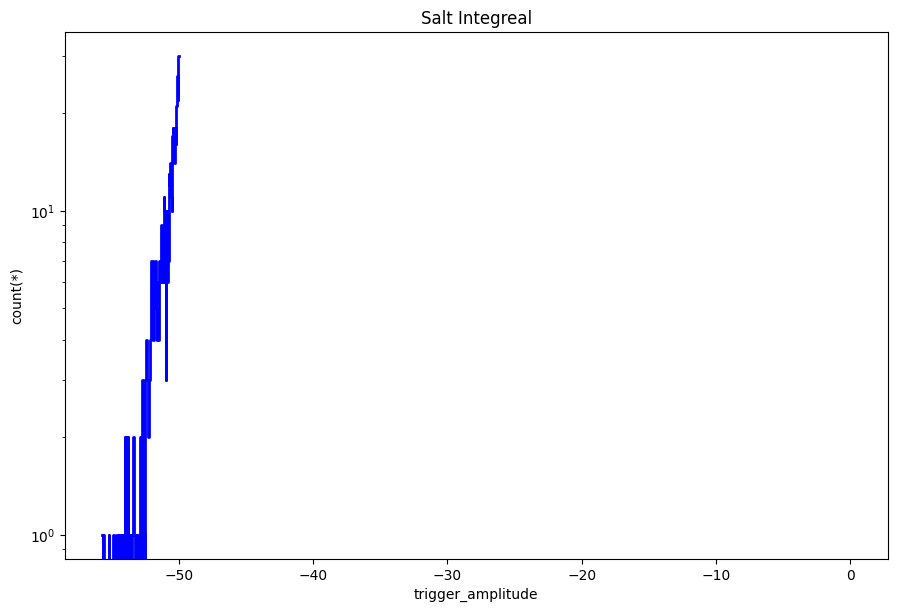

In [12]:
fig, ax = salt.hist('trigger_amplitude',
                          shape=128, title='Salt Integreal')

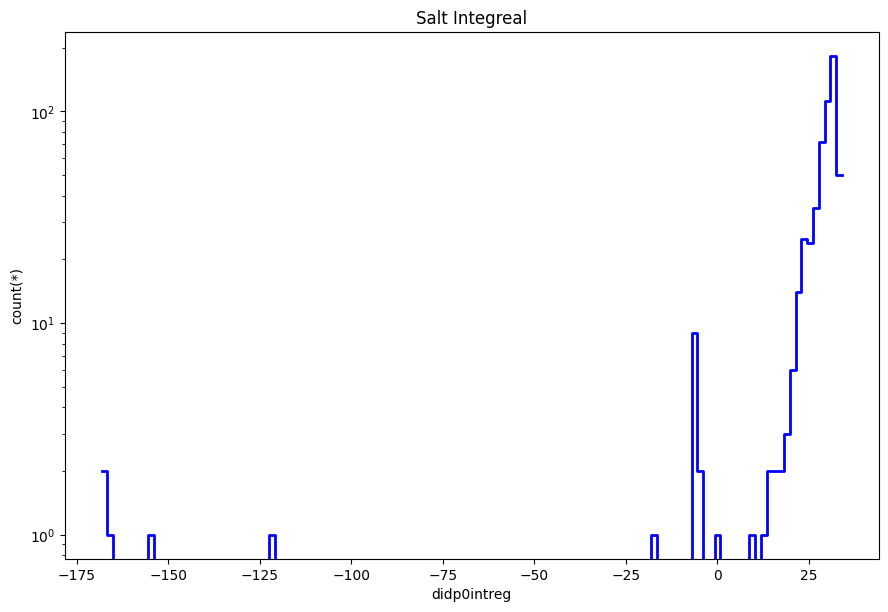

In [13]:
fig, ax = salt.hist('didp0intreg',
                          shape=128, title='Salt Integreal')

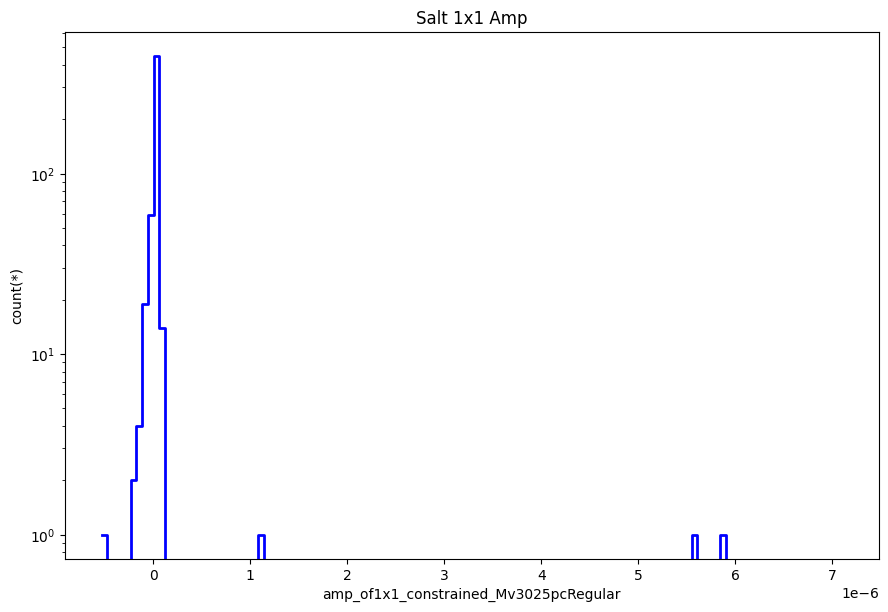

In [14]:
fig, ax = salt.hist('amp_of1x1_constrained_Mv3025pcRegular',
                          shape=128, title='Salt 1x1 Amp')

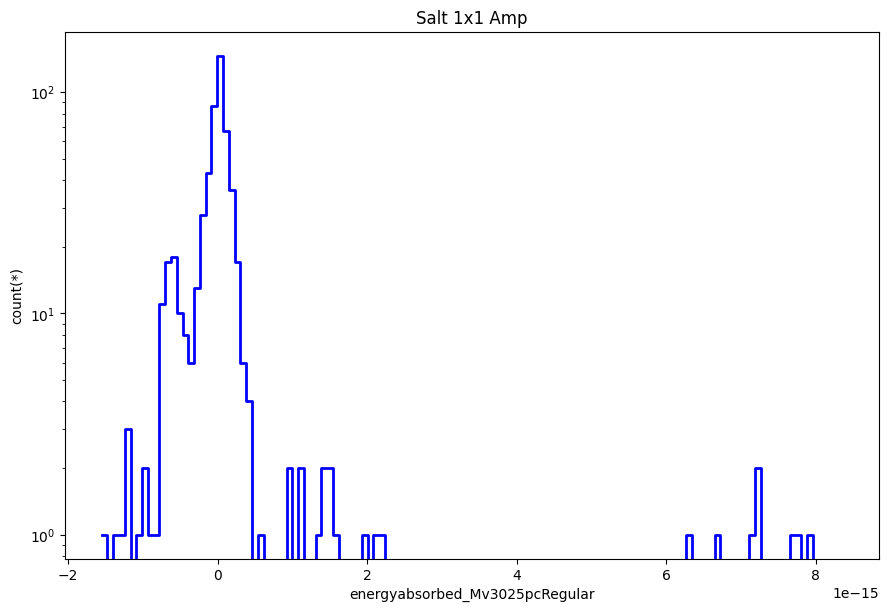

In [15]:
fig, ax = salt.hist('energyabsorbed_Mv3025pcRegular',
                         shape=128, title='Salt 1x1 Amp')

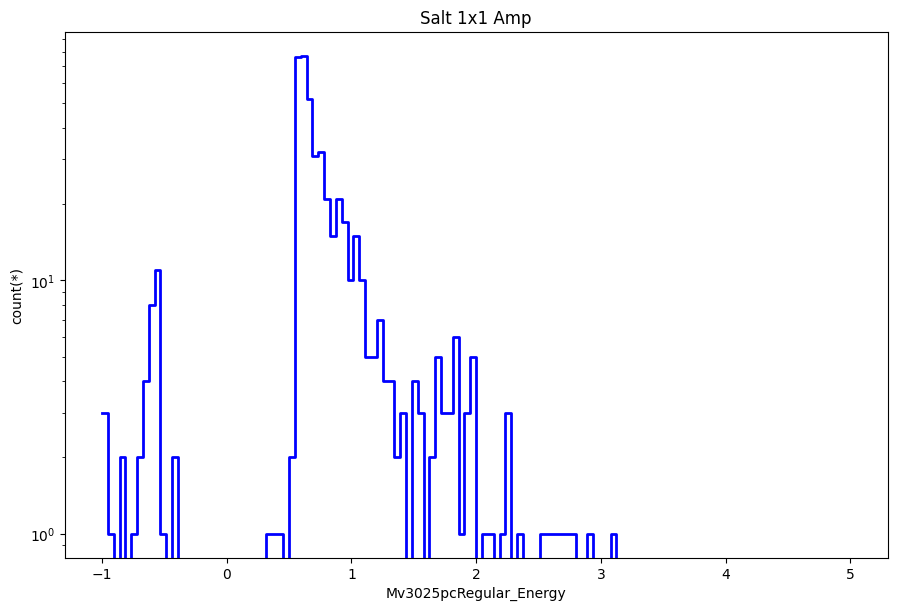

In [22]:
fig, ax = salt.hist('Mv3025pcRegular_Energy',
                          shape=128, title='Salt 1x1 Amp',limits=[-1,5])

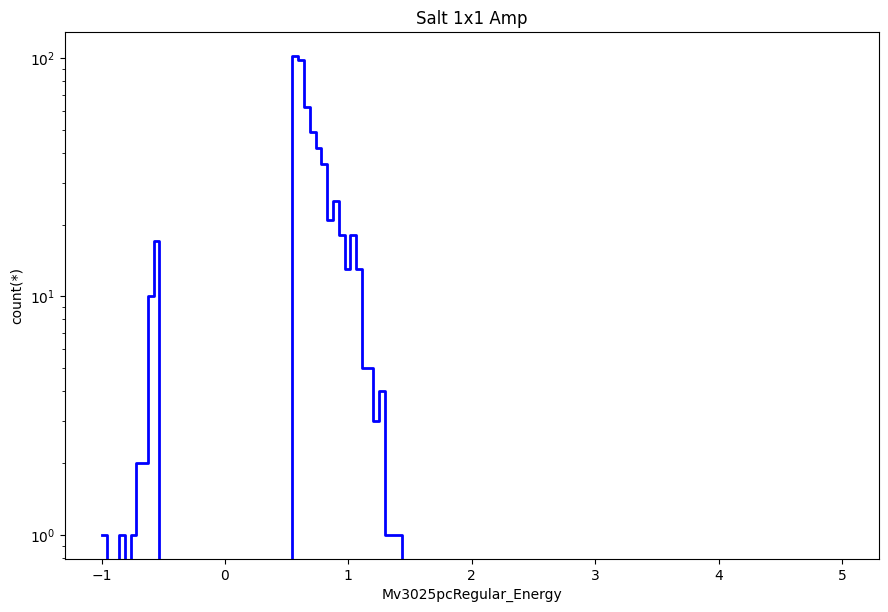

In [17]:
fig, ax = nosalt.hist('Mv3025pcRegular_Energy',
                          shape=128, title='Salt 1x1 Amp',limits=[-1,5])

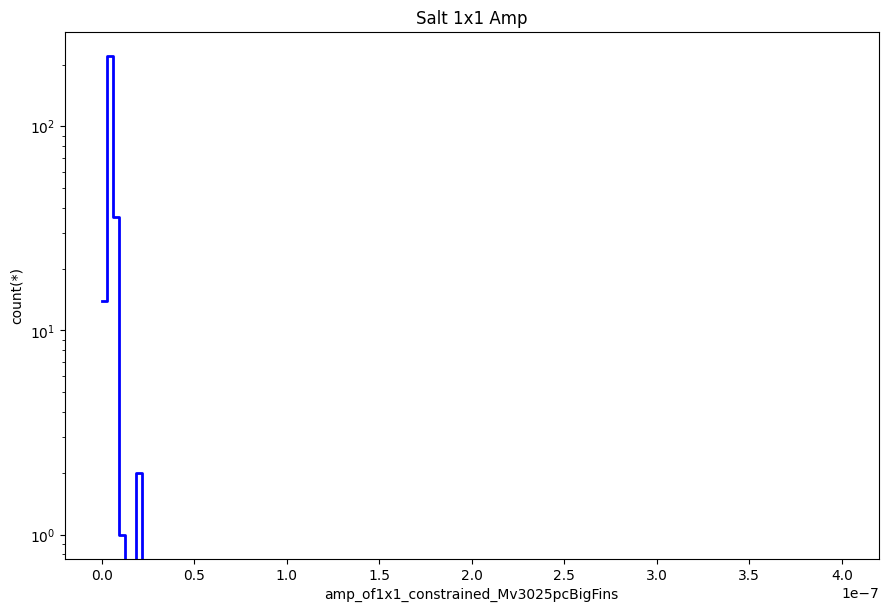

In [18]:
fig, ax = nosalt.hist('amp_of1x1_constrained_Mv3025pcBigFins',
                          shape=128, title='Salt 1x1 Amp',limits=[0,4e-7])

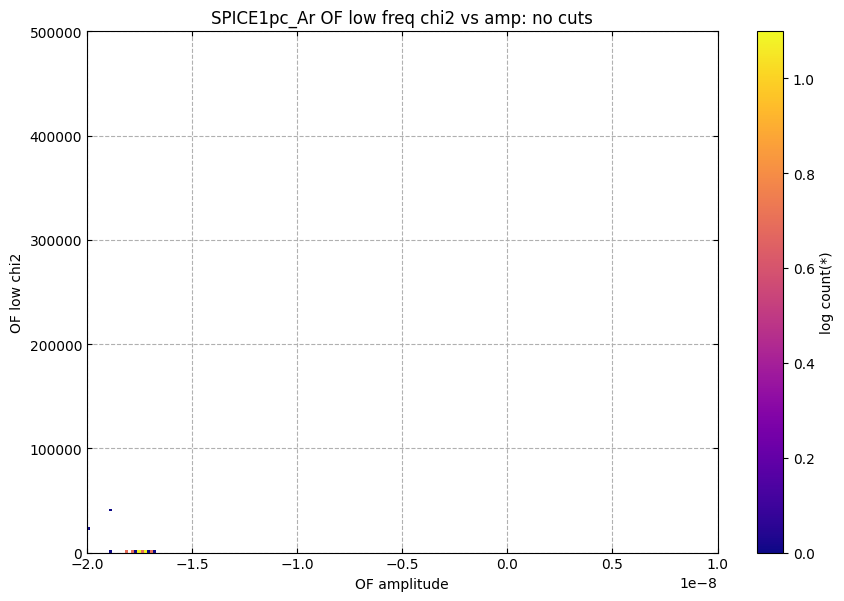

In [19]:
fig,ax  = salt.heatmap('amp_of1x1_constrained_Mv3025pcRegular',
                             'lowchi2_of1x1_constrained_Mv3025pcRegular',
                               shape=200,
                               xlimits = [-0.02e-6,1e-8],
                               ylimits = [0,0.5e6],
                               xlabel='OF amplitude', ylabel='OF low chi2',
                               title='SPICE1pc_Ar OF low freq chi2 vs amp: no cuts',
                               )

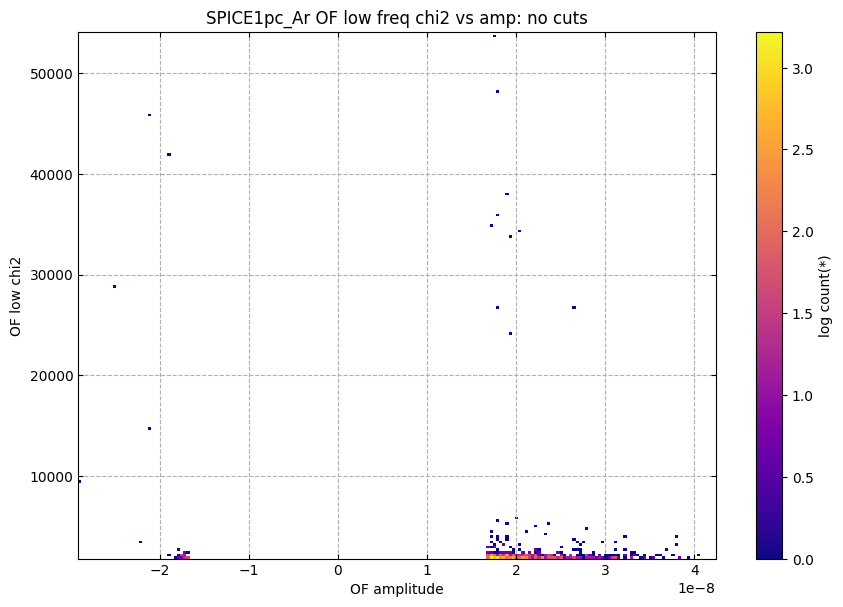

In [20]:
fig,ax  = nosalt.heatmap('amp_of1x1_constrained_Mv3025pcRegular',
                             'lowchi2_of1x1_constrained_Mv3025pcRegular',
                               shape=200,
                               xlabel='OF amplitude', ylabel='OF low chi2',
                               title='SPICE1pc_Ar OF low freq chi2 vs amp: no cuts',
                               )